# Exploratory Data Analysis

#### Import Dependencies

In [22]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import seaborn as sns
import math
import statsmodels.api as sm

#### Read in Train Dataset

In [23]:
df = pd.read_csv("train.csv", header=0, sep=",")
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# convert numeric columns to integers
integer_columns = ["Age", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema", "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices", "No Finding"]

for column in integer_columns:
    df[column] = df[column].astype(int)

df

,Path,Sex,Age,Frontal/Lateral,AP/PA,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,1,1,1,0,1,1,0,1,0,1,0,0,0,0
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,1,1,1,1,0,1,1,1,0,0,1,1,0,0
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,1,1,1,1,0,1,1,1,0,0,1,1,0,0
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,1,1,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0/train/patient64537/study2/view1_...,Male,59,Frontal,AP,0,0,1,0,0,0,0,1,1,1,0,1,1,0
223410,CheXpert-v1.0/train/patient64537/study1/view1_...,Male,59,Frontal,AP,1,1,1,0,0,1,1,1,0,1,1,1,0,0
223411,CheXpert-v1.0/train/patient64538/study1/view1_...,Female,0,Frontal,AP,1,1,1,0,1,0,0,0,0,0,0,0,0,0
223412,CheXpert-v1.0/train/patient64539/study1/view1_...,Female,0,Frontal,AP,1,1,1,0,1,1,0,1,0,0,0,0,1,0


In [26]:
# display train df summary information
summary = df.info()
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Path                        223414 non-null  object
 1   Sex                         223414 non-null  object
 2   Age                         223414 non-null  int64 
 3   Frontal/Lateral             223414 non-null  object
 4   AP/PA                       191027 non-null  object
 5   Enlarged Cardiomediastinum  223414 non-null  int64 
 6   Cardiomegaly                223414 non-null  int64 
 7   Lung Opacity                223414 non-null  int64 
 8   Lung Lesion                 223414 non-null  int64 
 9   Edema                       223414 non-null  int64 
 10  Consolidation               223414 non-null  int64 
 11  Pneumonia                   223414 non-null  int64 
 12  Atelectasis                 223414 non-null  int64 
 13  Pneumothorax                2

In [27]:
# change column name of "No Finding"
df.rename(columns={"No Finding": "No_Finding"}, inplace=True)

# convert binary variables to categorical (factor)
cat_vars = ['Sex',
 'Frontal/Lateral',
 'AP/PA',
 'Enlarged Cardiomediastinum',
 'Cardiomegaly',
 'Lung Opacity',
 'Lung Lesion',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Pleural Effusion',
 'Pleural Other',
 'Fracture',
 'Support Devices']

df[cat_vars] = df[cat_vars].astype("category")

# display class of each column
column_classes = df.apply(lambda column: column.dtype)
print(column_classes)

Path                            object
Sex                           category
Age                              int64
Frontal/Lateral               category
AP/PA                         category
Enlarged Cardiomediastinum    category
Cardiomegaly                  category
Lung Opacity                  category
Lung Lesion                   category
Edema                         category
Consolidation                 category
Pneumonia                     category
Atelectasis                   category
Pneumothorax                  category
Pleural Effusion              category
Pleural Other                 category
Fracture                      category
Support Devices               category
No_Finding                       int64
dtype: object


#### Functions to Call

In [6]:
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize=True).sort_index()
    n_colors = len(variable_df)
    palette = sns.color_palette("Set2", n_colors)
    
    ax = variable_df.plot(kind='barh',
                          stacked=True,
                          color=palette,
                          width=0.8, ax=ax)
    
    handles = [mpatches.Patch(color=palette[i], label=value) for i, (value, _) in enumerate(variable_df.items())]
    ax.legend(handles=handles, title=variable)
    
def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12,n_rows*3))

    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows,2,i+1)
        eda_categorical(data, variable, ax=ax)
    
    plt.tight_layout()
    plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous) / 3)
    fig = plt.figure(figsize=(12, n_rows * 5))
    palette = sns.color_palette('Set2', 3)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows, 3, i + 1)
        sns.boxplot(y=variable, data=data, orient='v', palette=[palette[i]], ax=ax)  # Specify y parameter
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

#### Split Continuous vs. Categorical Variables

In [7]:
continuous, categorical = [], []
black_list = ['Path']

for col in [c for c in df.columns if c not in black_list and c != 'No_Finding']:
    if is_numeric_dtype(df[col]):
        continuous.append(col)
    else:
        categorical.append(col)

#### Age vs. No_Finding Pairplot

Exploring how the distribution of "age" differs based on the presence or absence of a finding ('No_Finding').

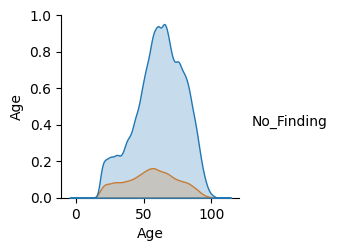

In [8]:
sns.pairplot(df[continuous + ['No_Finding']], hue='No_Finding', diag_kind='kde')
plt.show()

In [28]:
n = len(df)
n_no_finding = sum(df['No_Finding'])
n_finding = n - n_no_finding

print('Dataset contains %d records' % (n))
print('Number of patients with findings: %d (%0.2f%%)' % (n_finding, n_finding*100/n))

Dataset contains 223414 records
Number of patients with findings: 187888 (84.10%)


#### Categorical Variable Exploration

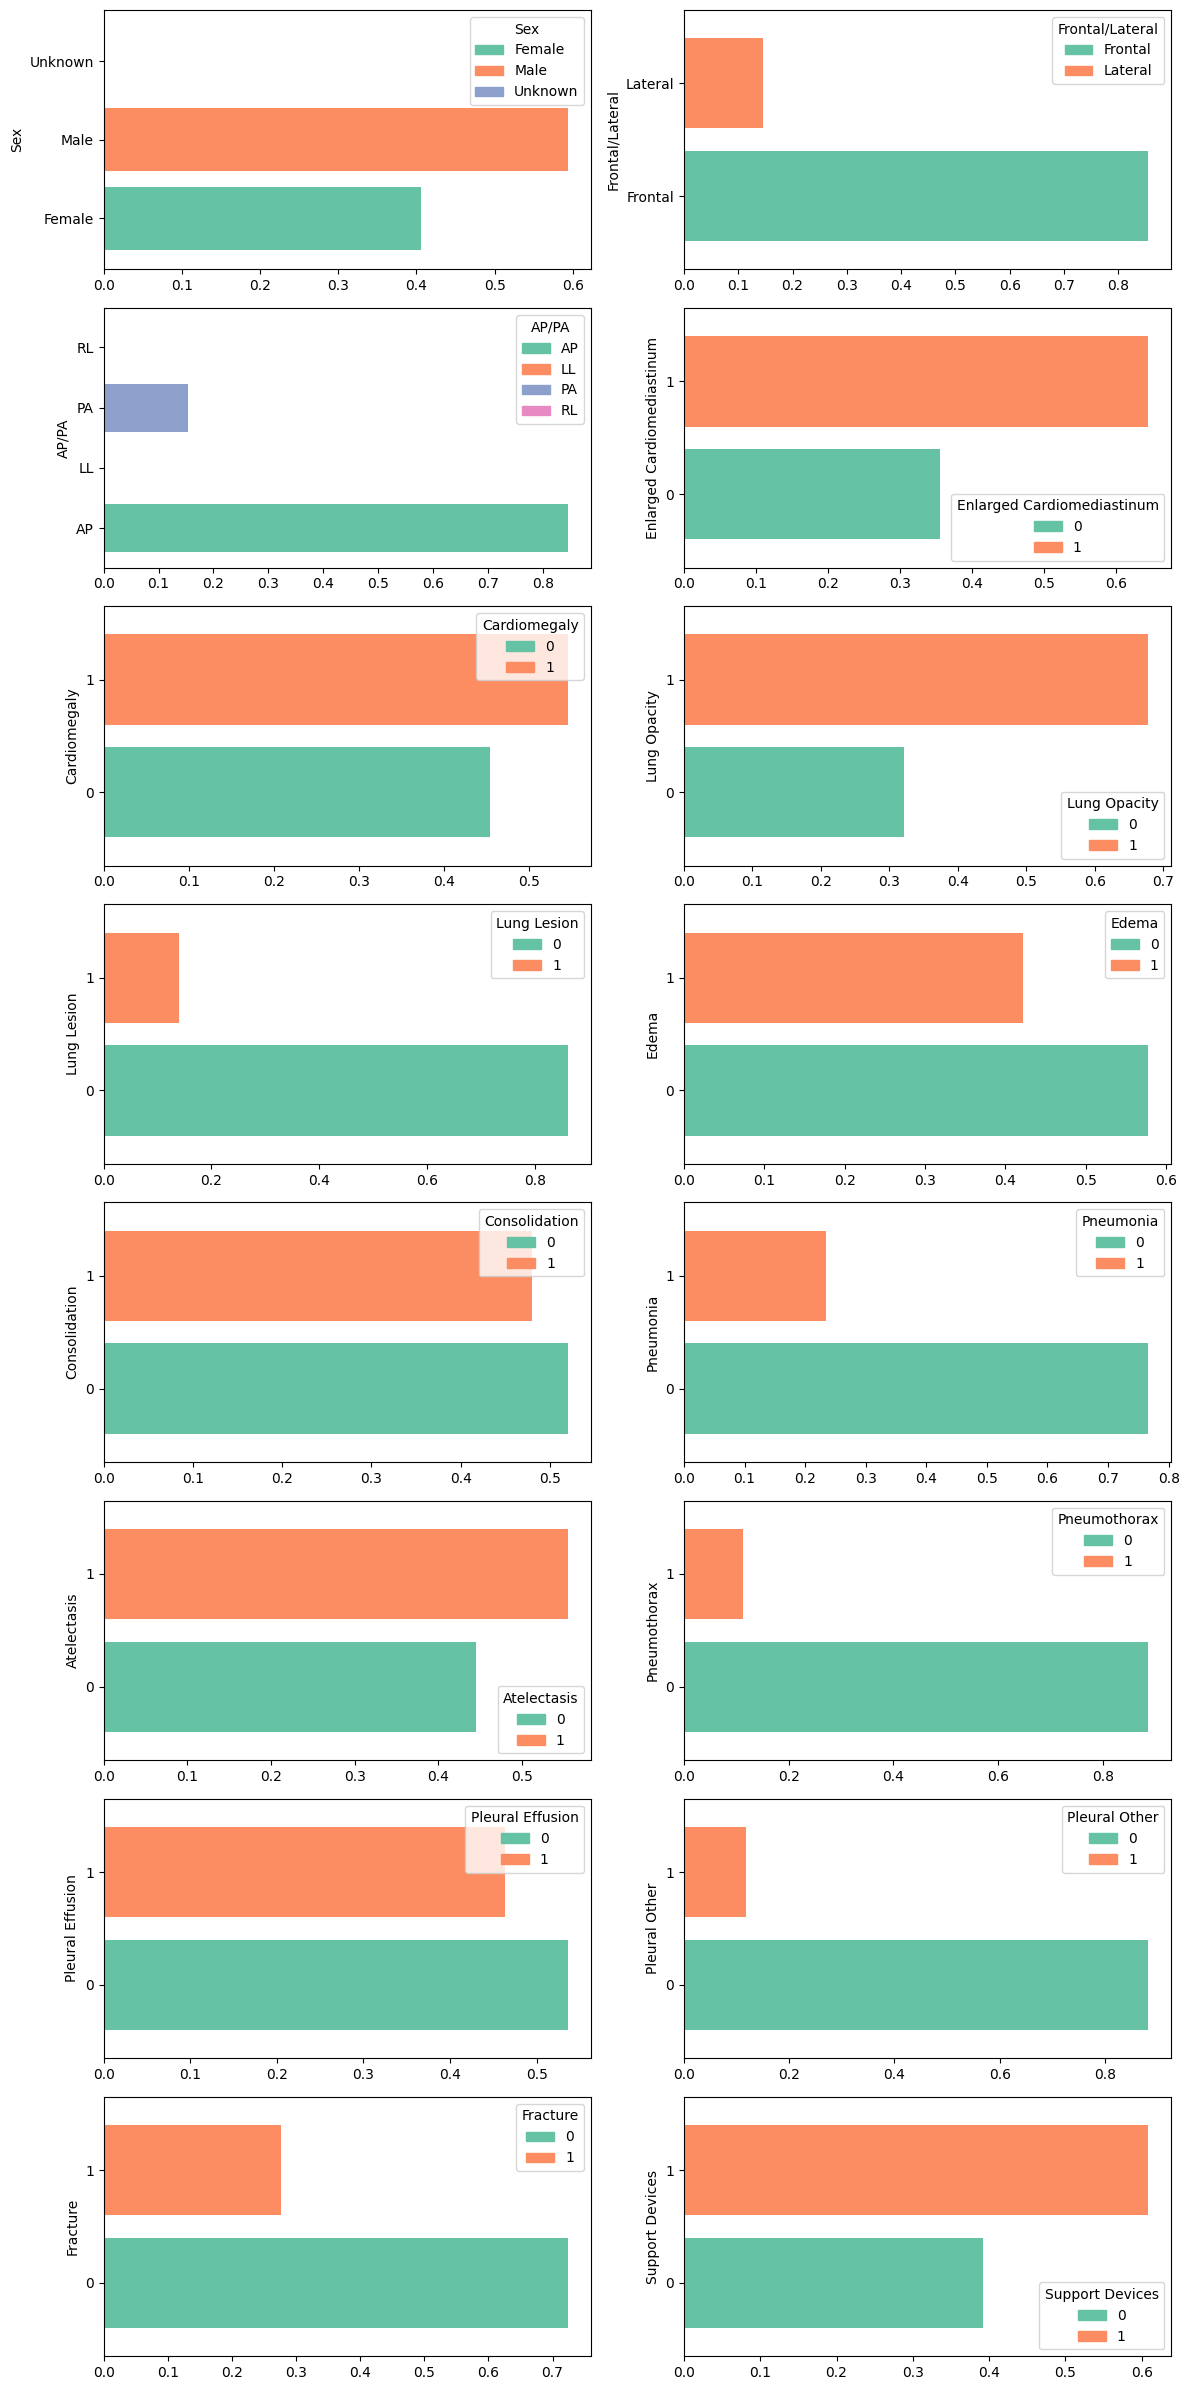

In [9]:
multiple_eda_categorical(df, categorical)

#### Continuous Variable Exploration

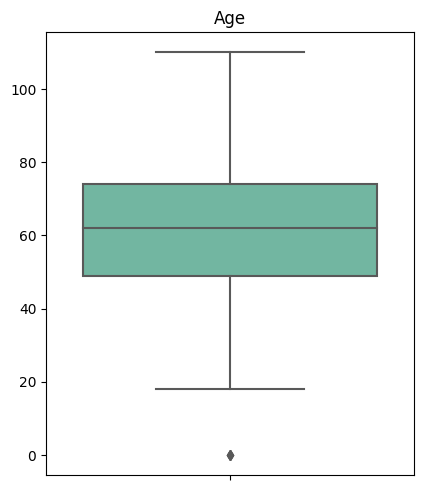

In [10]:
multiple_eda_continuous(df, continuous)

#### One-Hot Encoding for Logistic Regression

In [29]:
# one-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# exclude non-numeric columns and fit logistic regression model
X = df.drop(["No_Finding", "Path"], axis=1)  # features (excluding "No_Finding" and "Path" columns)
X = sm.add_constant(X)  # add constant term
y = df["No_Finding"]  # target variable

model = sm.Logit(y, X.astype(float))
result = model.fit()

# display summary
print(result.summary())

         Current function value: 0.096312
         Iterations: 35


LinAlgError: Singular matrix

#### Correlation Matrix

In [30]:
correlation_matrix = X.corr()
print(correlation_matrix)

                              const       Age  Sex_Male  Sex_Unknown  \
const                           NaN       NaN       NaN          NaN   
Age                             NaN  1.000000 -0.038780    -0.003119   
Sex_Male                        NaN -0.038780  1.000000    -0.002557   
Sex_Unknown                     NaN -0.003119 -0.002557     1.000000   
Frontal/Lateral_Lateral         NaN -0.032879  0.032552    -0.000871   
AP/PA_LL                        NaN -0.000895  0.002694    -0.000018   
AP/PA_PA                        NaN -0.074721  0.049023     0.005433   
AP/PA_RL                        NaN -0.001943 -0.002557    -0.000004   
Enlarged Cardiomediastinum_1    NaN  0.169328 -0.000263    -0.002848   
Cardiomegaly_1                  NaN  0.170715  0.001229    -0.002319   
Lung Opacity_1                  NaN  0.145236 -0.000387    -0.003071   
Lung Lesion_1                   NaN -0.028961  0.004610    -0.000850   
Edema_1                         NaN  0.128420 -0.015321    -0.00

#### Correlation Matrix Output

Some variables that appear to have high correlations based on absolute values of correlation coefficients include:

1. Cardiomegaly_1 and Enlarged Cardiomediastinum_1 (correlation coefficient: 0.810735)
2. Cardiomegaly_1 and Lung Opacity_1 (correlation coefficient: 0.615563)
3. Lung Opacity_1 and Atelectasis_1 (correlation coefficient: 0.737755)
4. Pleural Effusion_1 and Atelectasis_1 (correlation coefficient: 0.810763)
5. Pleural Other_1 and Lung Lesion_1 (correlation coefficient: 0.586588)

#### Correlation Heatmap

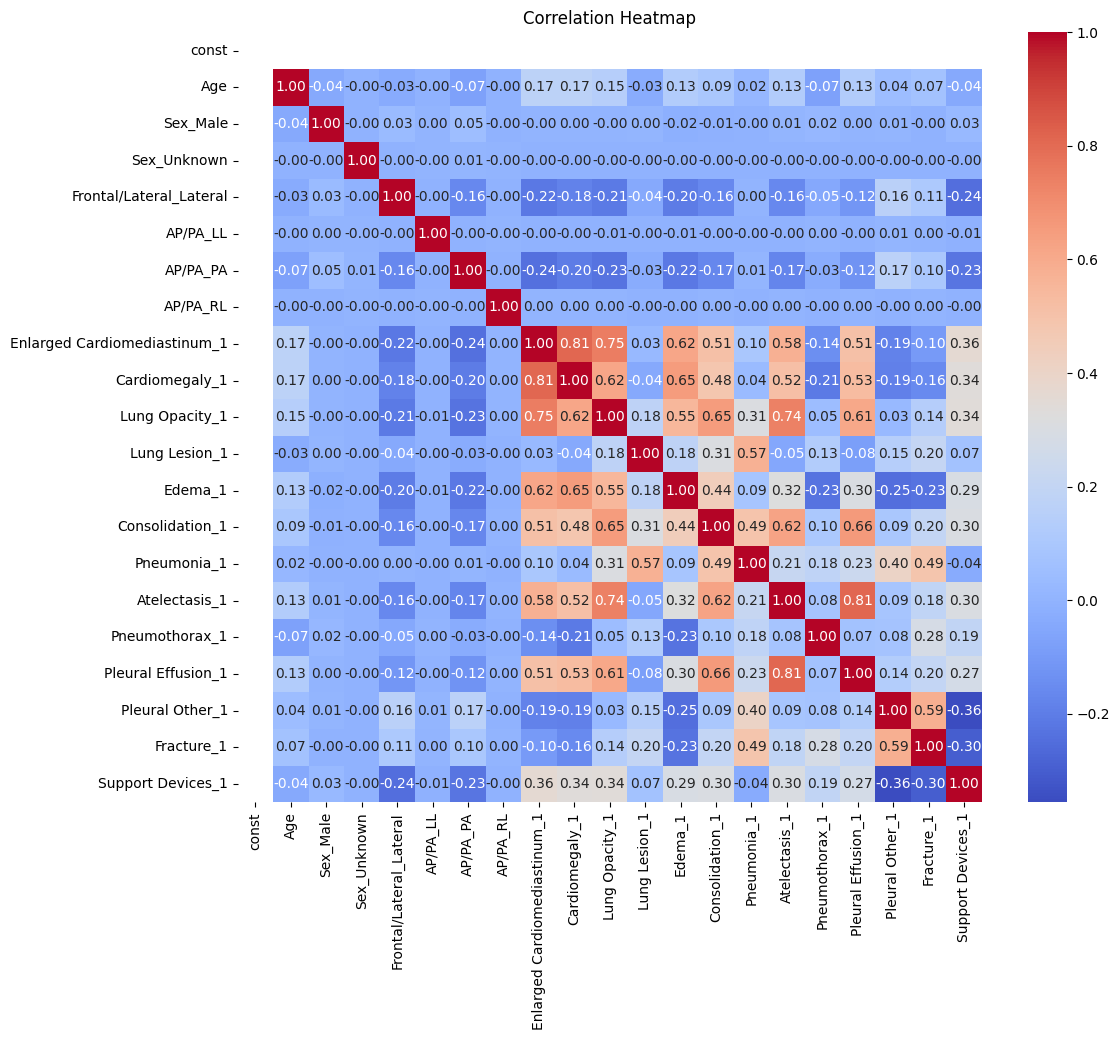

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Age Distribution

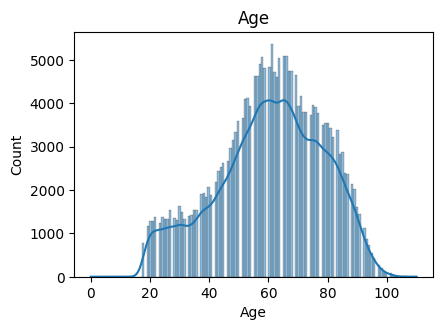

In [14]:
plt.figure(figsize=(12, 6))
for col in continuous:
    plt.subplot(2, 3, continuous.index(col) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

#### Age Distribution by Gender

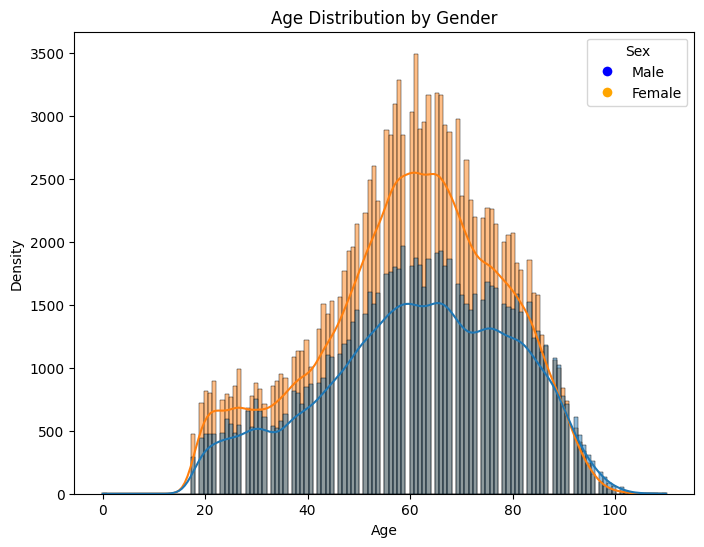

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Sex_Male', kde=True)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Density")

# manually create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='blue', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='orange', markersize=8)]
plt.legend(handles=handles, title="Sex")

plt.show()

The distribution of the data for females shows higher density bars and is more narrow for age distribution. This means  the ages for females are more concentrated around a certain range, indicating less variability in age among females. Conversely, the bars for the male distribution are shorter and the distribution covers a wider range of ages. This suggests that the ages for males in the dataset are more spread out, covering a wider range of ages and indicating greater variability in age among males.

### Feature Importance
Explore which features have the most influence on the target variable (No_Finding).

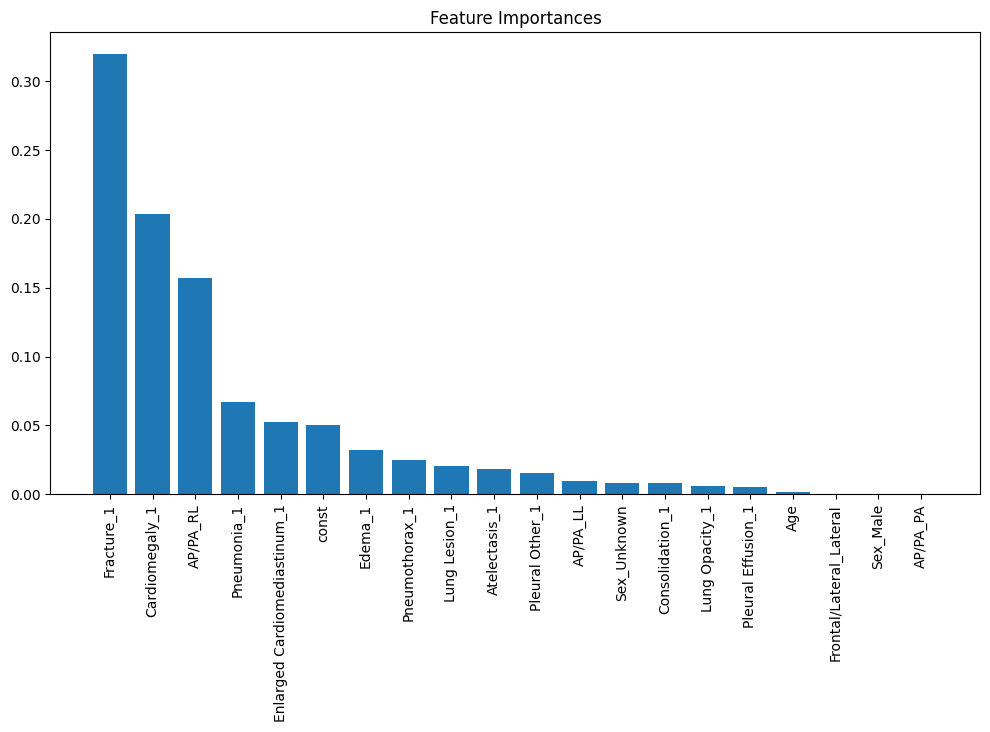

In [33]:
from sklearn.ensemble import RandomForestClassifier

# fit random forest classifier
rf = RandomForestClassifier()
rf.fit(X.drop(['const'], axis=1), y)

# get feature importances
importances = rf.feature_importances_

# sort and plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

/var/folders/yq/r0v5w1dx2h52_q6st20mxknc0000gn/T/ipykernel_3738/427134375.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)
/var/folders/yq/r0v5w1dx2h52_q6st20mxknc0000gn/T/ipykernel_3738/427134375.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)
/var/folders/yq/r0v5w1dx2h52_q6st20mxknc0000gn/T/ipykernel_3738/427134375.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)
/var/folders/yq/r0v5w1dx2h52_q6st20mxknc0000gn/T/ipykernel_3738/427134375.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated si

ValueError: num must be an integer with 1 <= num <= 16, not 17

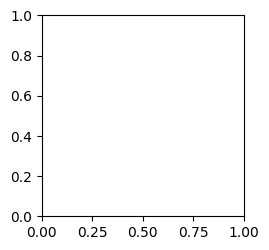

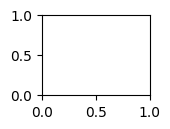

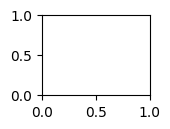

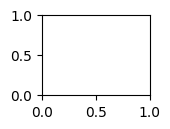

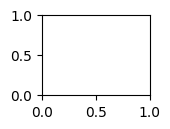

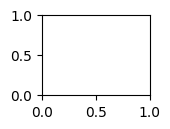

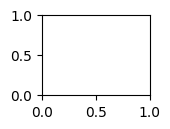

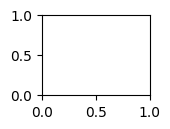

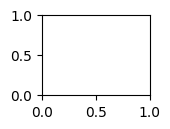

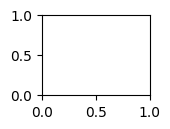

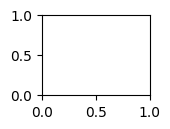

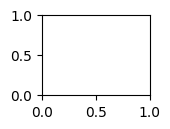

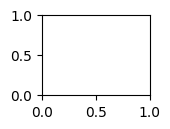

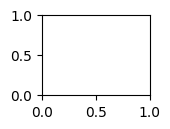

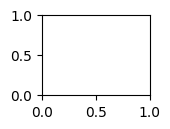

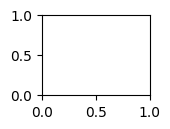

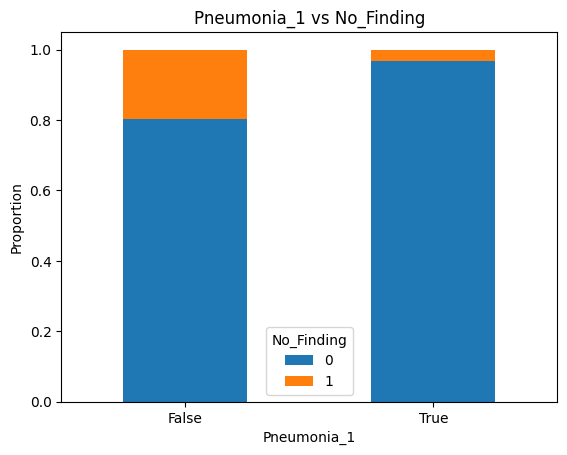

In [16]:
def eda_categorical_vs_target(data, variable, target, ax=None):
    cross_tab = pd.crosstab(data[variable], data[target], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=ax)
    plt.title(f"{variable} vs {target}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)

categorical = ['Path', 'Age', 'No_Finding', 'Sex_Male', 'Sex_Unknown',
       'Frontal/Lateral_Lateral', 'AP/PA_LL', 'AP/PA_PA', 'AP/PA_RL',
       'Enlarged Cardiomediastinum_1', 'Cardiomegaly_1', 'Lung Opacity_1',
       'Lung Lesion_1', 'Edema_1', 'Consolidation_1', 'Pneumonia_1',
       'Atelectasis_1', 'Pneumothorax_1', 'Pleural Effusion_1',
       'Pleural Other_1', 'Fracture_1', 'Support Devices_1']

plt.figure(figsize=(12, 12))
for i, variable in enumerate(categorical):
    plt.subplot(4, 4, i + 1)
    eda_categorical_vs_target(df, variable, 'No_Finding')
plt.tight_layout()
plt.show()
